## Stacks pipeline batch 2 - data exploration & visualization

<br>
This notebook includes: 
1. heterozygosity v. read depth
2. Haplotype Fis distribution
4. read depth by tag number, distribution of read depth per tag
5. Histogram of SNP position in read
6. Fst v. SNP position (for haplotypes with only 1 SNP)
7. Het v. SNP position 
8. Fis v. heterozygosity

<br>
<br>
#### 6/14/2017
<br>
### (1) heterozygosity v. read depth 

**This uses a script from Dan Drinan to compare average observed heterozygosity v. read depth by individual. I ran the script on all individuals that were *retained after the filtering steps***

**Observed heterozygosity was calculated using `genepop`**

**Read depth was calculated as the number of sequences in the original `fastq` file. **

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [4]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/scripts


In [8]:
!head -n 30 hetVsReadDepth.py



################################################################################
#
# hetVsReadDepth.py - this is a script used to compare heterozygosity vs.
# read depth in an individual or list of individuals
#
# 2017-March-28
# Daniel Drinan (ddrinan@uw.edu)
#
################################################################################

import argparse, subprocess

parser = argparse.ArgumentParser()
# it is either run with '-l' if you want to compare heterozygosity and read depth
# of a bunch of individuals
#
# or, if you are only interested in a single individual, you run with '-i' and
# '-f' 
parser.add_argument("-l", "--list", help="white space delimited list of individuals \
                                          (column1) and corresponding sequence file \
                                          (column2; FASTA or FASTQ) to investigate")
parser.add_argument("-i", "--ind", help="name of individual to investigate (mutually \
                                         exclu

In [9]:
!mv hetVsReadDepth.py ../samplesT92/hetVsReadDepth.py

In [10]:
cd ../samplesT92/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92


In [ ]:
!python hetVsReadDepth.py \
-l ../analyses/batch_2_FinalFilteredIndivids.txt \
-f ../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids_filteredHWE.gen \
-o ../analyses/batch2_HetvReadDepth_filtered \
-d 4

In [1]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [2]:
myfile = open("batch2_HetvReadDepth_filtered", "r")

count = 0
read_depth = []
prop_het = []

for line in myfile: 
    if count > 1: 
        new_depth = line.strip().split()[1]
        new_het = line.strip().split()[2]
        read_depth.append(new_depth)
        prop_het.append(new_het)
        count += 1
    else: 
        count += 1

myfile.close()

print "Processed ", count, " samples."


Processed  287  samples.


In [3]:
length = len(read_depth)
for i in range(0,length):
    read_depth[i] = float(read_depth[i])

length = len(prop_het)
for i in range(0,length):
    prop_het[i] = float(prop_het[i])
    

In [4]:
import numpy as np
import matplotlib.pyplot as plt

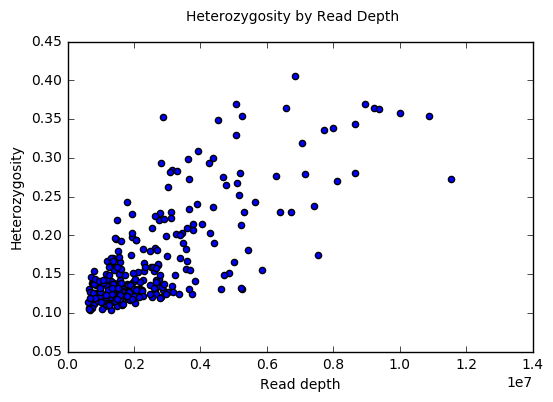

In [5]:
plt.scatter(read_depth, prop_het)
plt.suptitle("Heterozygosity by Read Depth")
plt.xlabel("Read depth")
plt.ylabel("Heterozygosity")
plt.show()

In [6]:
plt.close()

To find the correlation between the two: 

In [7]:
np.corrcoef(read_depth, prop_het)

array([[ 1.        ,  0.76704982],
       [ 0.76704982,  1.        ]])

**The correlation between heterozygosity and read depth is 0.7594**


<br>
<br>

**Colored by Population**

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [2]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [7]:
myfile = open("batch2_HetvReadDepth_filtered", "r")

count = 0
read_depth = []
prop_het = []
colors = []

for line in myfile: 
    if count > 1: 
        new_depth = line.strip().split()[1]
        new_het = line.strip().split()[2]
        read_depth.append(new_depth)
        prop_het.append(new_het)
        count += 1
        sampleID = line.strip().split()[0]
        if sampleID.startswith("KOD"):
            colors.append("firebrick")
        elif sampleID.startswith("AD"):
            colors.append("sienna")
        elif sampleID.startswith("WC"):
            colors.append("chartreuse")
        elif sampleID.startswith("HS"):
            colors.append("darkcyan")
        elif sampleID.startswith("PS"):
            colors.append("navy")
        elif sampleID.startswith("GS"):
            colors.append("darkorchid")
        elif sampleID.startswith("PWS"):
            colors.append("palevioletred")
        elif sampleID.startswith("UP"):
            colors.append("gold")
    else: 
        count += 1

myfile.close()

print "Processed ", count, " samples."


Processed  287  samples.


In [8]:
length = len(read_depth)
for i in range(0,length):
    read_depth[i] = float(read_depth[i])

length = len(prop_het)
for i in range(0,length):
    prop_het[i] = float(prop_het[i])
    

In [9]:
import numpy as np
import matplotlib.pyplot as plt

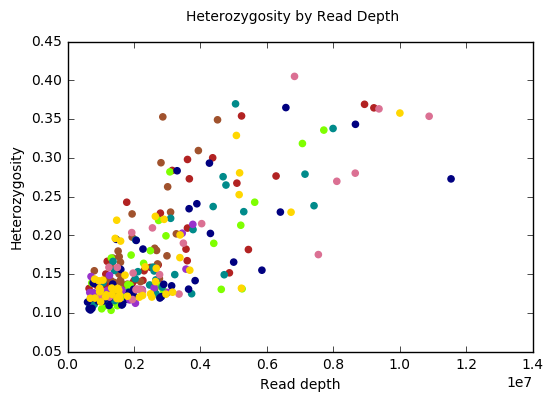

In [10]:
plt.scatter(read_depth, prop_het, color = colors)
plt.suptitle("Heterozygosity by Read Depth")
plt.xlabel("Read depth")
plt.ylabel("Heterozygosity")
plt.show()

<br>

**The correlation between heterozygosity and read depth is 0.7594**


<br>
<br>
<br>
<br>

### (2) Haplotype Fis distribution (R - hierfstat)

**This looks at the frequency of Fis values across haplotypes - first overall, and then in each population. The haplotype is the combination of biallelic SNPs that is genotyped by stacks**

**This Fis was calculated using hierfstat and adegenet in R. **


<br>
<br>




**(1)** I ran this [r script](https://github.com/mfisher5/PCod-US-repo/blob/master/analyses/Fis.R) - borrowed from Natalie - to find per population Fis and heterozygosity. 

<br>
**(2)** Plot in frequency histogram based off of Natalie's [scallop notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/script_demos_notebooks/Plot%20num%20alleles%20per%20locus%20from%20catalog%20file.ipynb).

In [10]:
genepop = open("USpcod_Fis_batch2.txt", "r")
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]
fis_bypop = []
fis_all = []

counter = 1
NA_count = 0
total_count = 0
for line in genepop: 
    if counter == 1: 
            counter += 1
    else: 
        fis_values = line.strip().split()[1:]
        for i in fis_values:
            if i == "NA":
                NA_count += 1
                total_count += 1
            else: 
                fis_all.append(float(i))
                total_count += 1
        counter += 1

total_loci = counter - 2
print "Fis values recorded from ", total_loci, " loci."
print "Removed ", NA_count, " NAs from ", total_count, " Fis values"
        

Fis values recorded from  2410  loci.
Removed  3462  NAs from  19280  Fis values


In [11]:
for i in range(0, len(fis_all)): 
    fis_all[i] = float(fis_all[i])

In [12]:
import numpy as np
import matplotlib.pyplot as plt

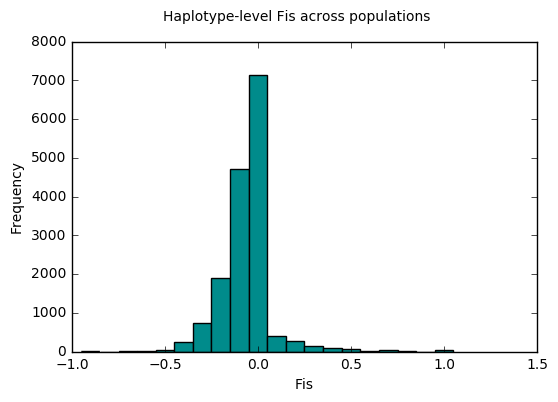

In [13]:
plt.hist(fis_all, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [14]:
fis_file = open("USpcod_Fis_3-24.txt", "r")
lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines
header_pops = headerline.strip().split("\t")
header_pops = header_pops[1:]
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]

In [15]:
header_pops

['"AD06_048"',
 '"WC05_048"',
 '"HS04_048"',
 '"PS12_009"',
 '"GS13_017"',
 '"PWS12_133"',
 '"UP03_048"']

In [16]:
fis_sets = []
NA_count = 0
total_count = 0

snp_all_fis = []
for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split("\t")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            snp_all_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."

NA count: 4616
NAs made up 17.13% of your Fis estimates.


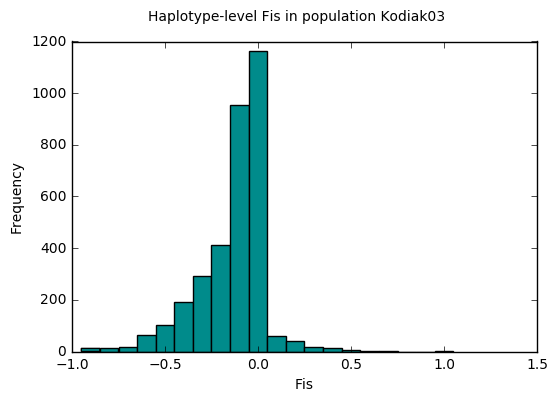

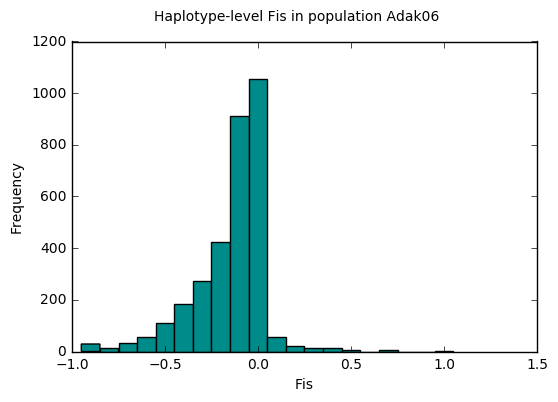

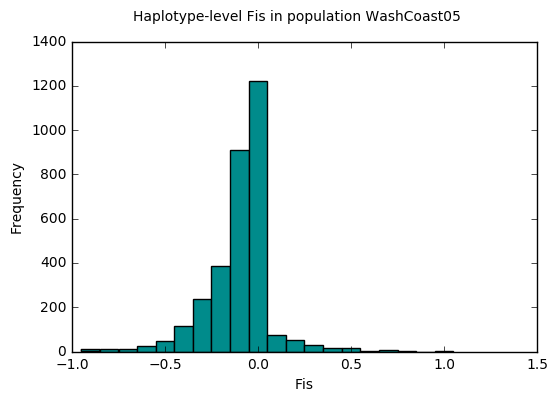

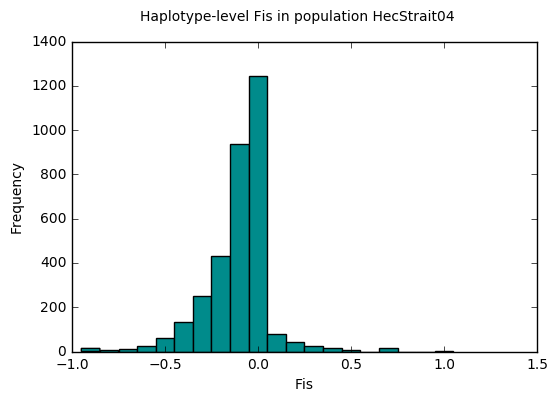

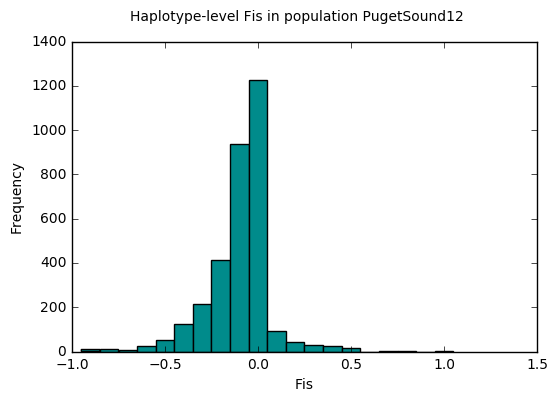

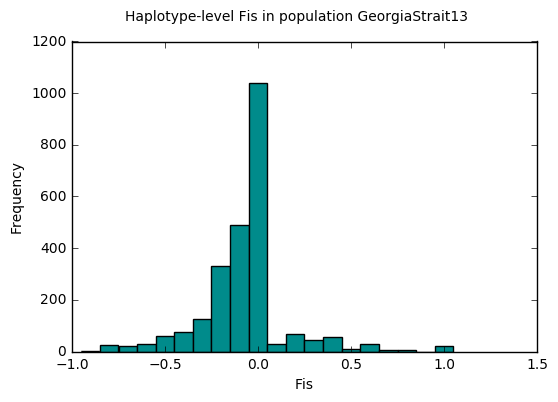

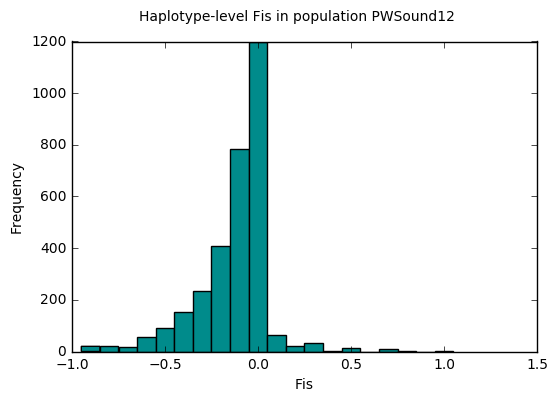

In [17]:
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
    plt.suptitle("Haplotype-level Fis in population " + pops[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

In [18]:
fis_file.close()






<br>
<br>
### (2b) Locus Fis Distributions (Genepop)

**(1) Generate the .INF genepop file and use Dan Drinan's script to parse it.**
<br>
**(2) Plot per locus Fis**

In [47]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [50]:
## Get population codes ##
fisfile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

fisfile.readline()

pop_codes = []

for line in fisfile:
    if line.strip().split()[0] not in pop_codes:
        pop_codes.append(line.strip().split()[0])
fisfile.close()

In [66]:
print pop_codes

['KOD03_097', 'AD06_048', 'WC05_048', 'HS04_048', 'PS12_009', 'GS13_017', 'PWS12_133', 'UP03_048']


In [81]:
# create list of lists containing fis values #

fisfile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

lines = fisfile.readlines() # save all lines in file to variable
fisfile.close()
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines

fis_sets = []
total_count = 0
pop_index = 0

snp_all_fis_gen = []
for pop in pop_codes:
    pop_fis = [] #create empty list
    for line in restlines:
        linelist = line.strip().split()
        if linelist[0] == pop: #if the population for that line matches pop we are interested in
            snp_fis = float(linelist[4])
            pop_fis.append(snp_fis) #append the snp fis to the pop specific fis list
            snp_all_fis_gen.append(snp_fis) #append the snp fis to the overall fis list
            total_count += 1
    pop_index += 1
    fis_sets.append(pop_fis)

print "Total SNPs counted: " + str(total_count)

Total SNPs counted: 15829


In [82]:
print len(snp_all_fis)

15829


In [83]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

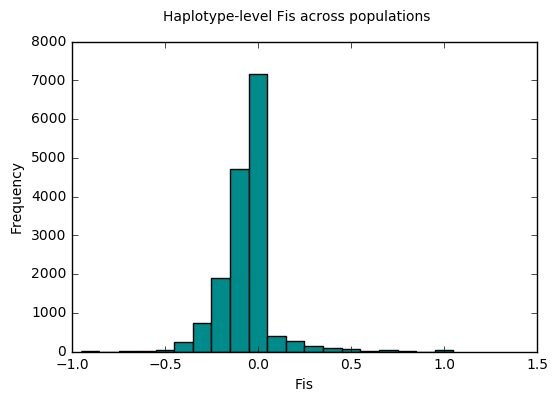

In [85]:
plt.hist(snp_all_fis_gen, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [86]:
plt.close()

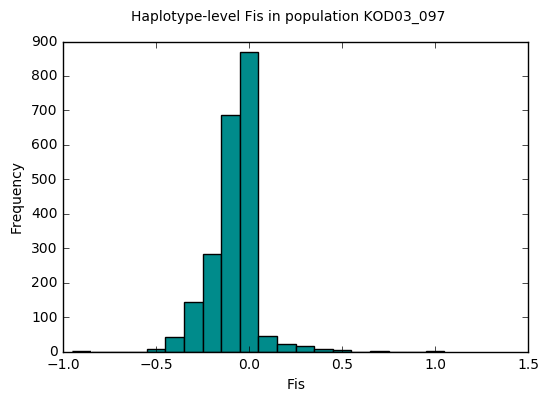

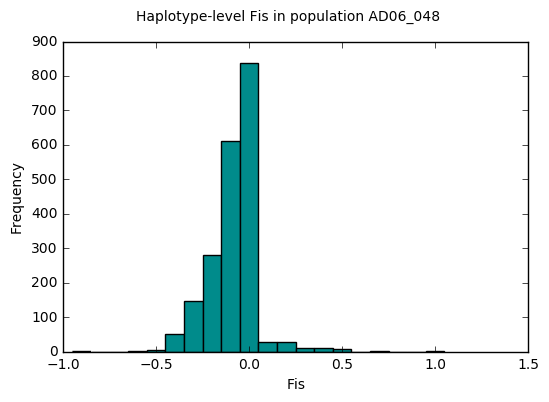

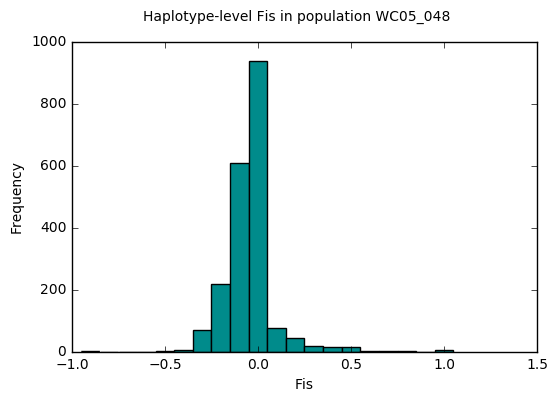

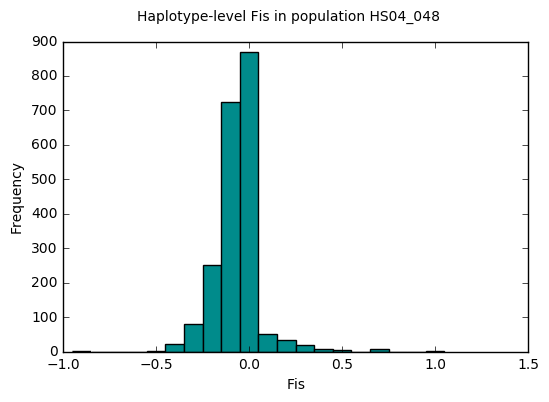

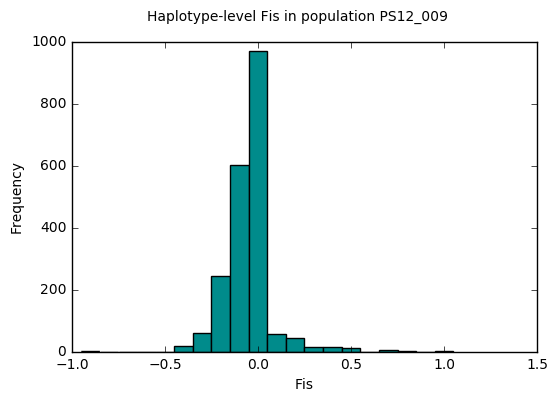

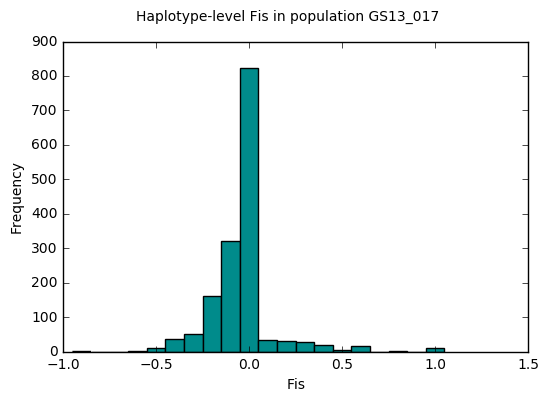

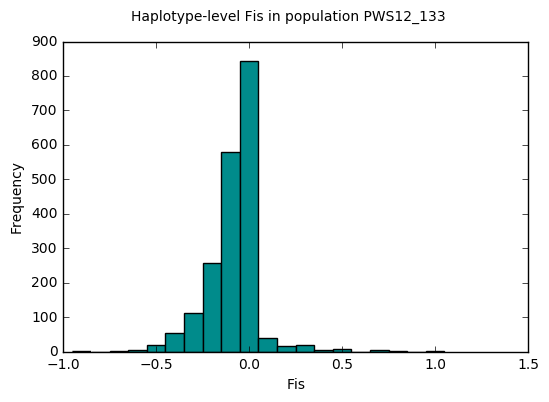

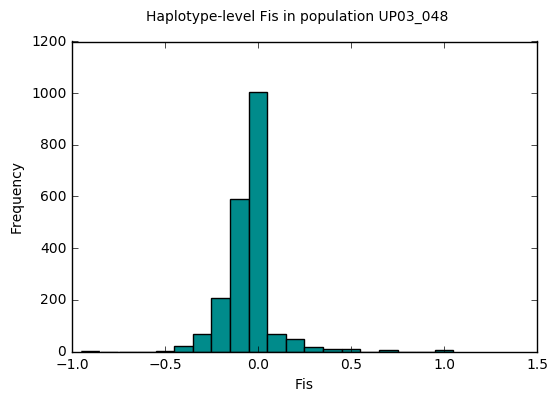

In [79]:
for i in range(0,len(pop_codes)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
    plt.suptitle("Haplotype-level Fis in population " + pop_codes[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

In [80]:
plt.close()

In [87]:
# create list of lists containing fis values USING THE DEPTH V. FIS TEXT FILE INSTEAD#

fisfile = open("batch_2_depthVfis.txt", "r")

lines = fisfile.readlines() # save all lines in file to variable
fisfile.close()
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines

fis_sets_2 = []
total_count = 0
pop_index = 0

snp_all_fis_2 = []
for pop in pop_codes:
    pop_fis = [] #create empty list
    for line in restlines:
        linelist = line.strip().split()
        if linelist[0] == pop: #if the population for that line matches pop we are interested in
            snp_fis = float(linelist[5])
            pop_fis.append(snp_fis) #append the snp fis to the pop specific fis list
            snp_all_fis_2.append(snp_fis) #append the snp fis to the overall fis list
            total_count += 1
    pop_index += 1
    fis_sets_2.append(pop_fis)

print "Total SNPs counted: " + str(total_count)

Total SNPs counted: 15829


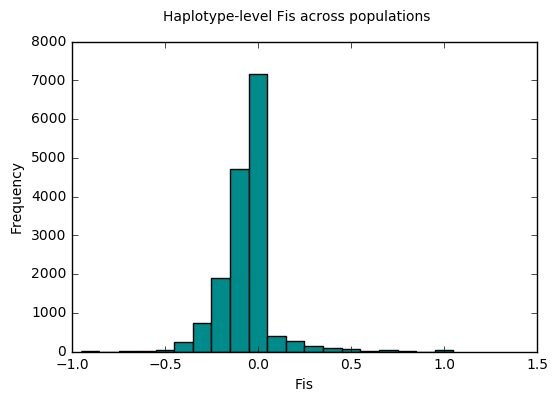

In [88]:
plt.hist(snp_all_fis_2, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [89]:
plt.close()




<br>
<br>
<br>
### (3) Distribution of average read depth per tag ID

**I found the read depth of each catalog tag (aka each locus from the reference "genome") in each individual, and then took an average of those read depths for each catalog tag. I then plotted this against tag ID, and as a frequency histogram.**

**Read depth was calculated as the sum of the number of reads listed for that tag in the `.matches` files after `sstacks`**

<br>


Part of the following code was borrowed from Natalies [notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/data_processing_notebooks/plot_tagID_v_read_depth.ipynb). 

In [19]:
cd ../stacks_b2_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_b2_wgenome


In [23]:
myfile = open("../analyses/batch_2_FinalFilteredIndivids.txt", "r")
newfile = open("../analyses/batch2_list_matches_filenames.txt", "w")
for line in myfile:
    newfile.write(line.strip().split()[0] + "\n")
myfile.close()
newfile.close()

In [24]:
!head list_matches_filenames.txt

AD06_001.matches.tsv
AD06_002.matches.tsv
AD06_003.matches.tsv
AD06_004.matches.tsv
AD06_005.matches.tsv
AD06_006.matches.tsv
AD06_007.matches.tsv
AD06_008.matches.tsv
AD06_009.matches.tsv
AD06_010.matches.tsv


In [25]:
# create a list of .matches.tsv file names to open below
file_of_filenames = open("list_matches_filenames.txt","r")
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)

In [26]:
print filename_list[0:5]

['AD06_001.matches.tsv', 'AD06_002.matches.tsv', 'AD06_003.matches.tsv', 'AD06_004.matches.tsv', 'AD06_005.matches.tsv']


In [27]:
#initiate dictionary
rd_final_dict = {}
reps = 0

for file in filename_list:
    rd_dict = {}
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]   #read all of file except header
    newcount = 0
    #create the individual's dictionary of read depths per locus
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in rd_dict:
            rd_dict[locus] = int(count) 
        elif locus in rd_dict:
            oldcount = rd_dict[locus]
            newcount = oldcount + count
            rd_dict[locus] = newcount
        else:
            print "Something funky is going on."
    #append all individual's counts to the final dictionary by locus
    locus_list = rd_dict.keys()
    for locus in locus_list: 
        reads = rd_dict[locus]
        if locus not in rd_final_dict: 
            rd_final_dict[locus] = [reads]
        else: 
            averages = rd_final_dict[locus]
            averages.append(reads)
            rd_final_dict[locus] = averages
    reps += 1
    print "file ", file, " counted."
    indfile.close()

file  AD06_001.matches.tsv  counted.
file  AD06_002.matches.tsv  counted.
file  AD06_003.matches.tsv  counted.
file  AD06_004.matches.tsv  counted.
file  AD06_005.matches.tsv  counted.
file  AD06_006.matches.tsv  counted.
file  AD06_007.matches.tsv  counted.
file  AD06_008.matches.tsv  counted.
file  AD06_009.matches.tsv  counted.
file  AD06_010.matches.tsv  counted.
file  AD06_011.matches.tsv  counted.
file  AD06_012.matches.tsv  counted.
file  AD06_013.matches.tsv  counted.
file  AD06_014.matches.tsv  counted.
file  AD06_015.matches.tsv  counted.
file  AD06_016.matches.tsv  counted.
file  AD06_017.matches.tsv  counted.
file  AD06_018.matches.tsv  counted.
file  AD06_019.matches.tsv  counted.
file  AD06_020.matches.tsv  counted.
file  AD06_021.matches.tsv  counted.
file  AD06_022.matches.tsv  counted.
file  AD06_023.matches.tsv  counted.
file  AD06_024.matches.tsv  counted.
file  AD06_025.matches.tsv  counted.
file  AD06_026.matches.tsv  counted.
file  AD06_027.matches.tsv  counted.
f

In [28]:
#checking final dictionary counts to make sure they are appending
#and not summing
print rd_final_dict[100]

[28, 11, 28, 20, 23, 28, 11, 15, 34, 14, 60, 23, 16, 37, 43, 15, 27, 18, 21, 10, 45, 11, 16, 28, 24, 13, 17, 11, 36, 68, 10, 42, 11, 35, 66, 56, 83, 24, 19, 68, 71, 13, 21, 31, 36, 41, 12, 21, 35, 18, 32, 10, 40, 53, 43, 52, 19, 53, 35, 13, 19, 15, 15, 35, 100, 25, 14, 24, 14, 43, 37, 14, 15, 14, 19, 27, 16, 14, 12, 14, 34, 10, 30, 57, 13, 48, 34, 25, 84, 16, 36, 23, 49, 13, 75, 30, 12, 66, 85, 15, 24, 41, 11, 16, 22, 10, 12, 13, 11, 25, 15, 10, 14, 70, 14, 43, 57, 30, 10, 11, 50, 21, 32, 10, 111, 10, 12, 21, 12, 51, 10, 31, 72, 38, 27, 13, 41, 16, 25, 19, 16, 59, 27, 41, 28, 84, 34, 71, 17, 83, 27, 45, 36, 16, 25, 84, 40, 32, 18, 26, 14, 50, 14, 45, 31, 12, 11, 19, 16, 43, 74, 28, 113, 59, 12, 11, 27, 17, 15, 22, 12, 24, 65, 51, 46, 15, 11, 19, 13, 39, 43, 28, 30, 15, 92, 50, 22, 113, 14, 28, 15, 45, 64, 31, 34, 30, 70, 38, 12, 44, 10, 56, 42, 17, 10, 45, 104, 10, 19, 70, 26, 39, 25, 16, 13, 17, 11, 22, 10, 17, 17]


In [29]:
#take averages at each locus
locus_list = rd_final_dict.keys()
rd_avg_dict = {}
for locus in locus_list: 
    newlist = rd_final_dict[locus]
    average = float(sum(newlist))/float(len(newlist))
    rd_avg_dict[locus] = average
        

In [30]:
#create a list of the read depth averages 
#by extracting values from dictionary
count_list = []
for locus in locus_list:
    avg_reads = rd_avg_dict[locus]
    count_list.append(avg_reads)

In [31]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

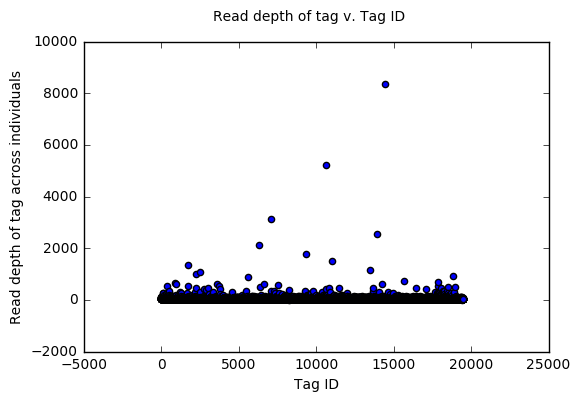

In [32]:
#create scatterplot
plt.scatter(locus_list, count_list)
plt.suptitle("Read depth of tag v. Tag ID")
plt.xlabel("Tag ID")
plt.ylabel("Read depth of tag across individuals")
plt.show()

In [33]:
plt.close()

In [34]:
# subset data to focus on read depths less than 1000
count_less_1000 = [num for num in count_list if num < 1000]

In [35]:
# what number of tags have a read depth of less than 100,000
len(count_less_1000)

19464

In [36]:
# what number of tags have a read depth of greater than 1000
len(count_list) - len(count_less_1000)

11

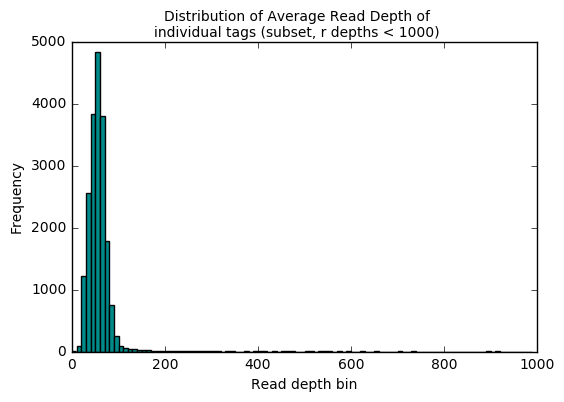

In [37]:
plt.hist(count_less_1000, bins = np.arange(0,1000, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags (subset, r depths < 1000)")
plt.show()

In [38]:
plt.close()

In [39]:
# subset read depths less than 400 (densest range in plot above)
count_less_400 = [num for num in count_list if num < 400]

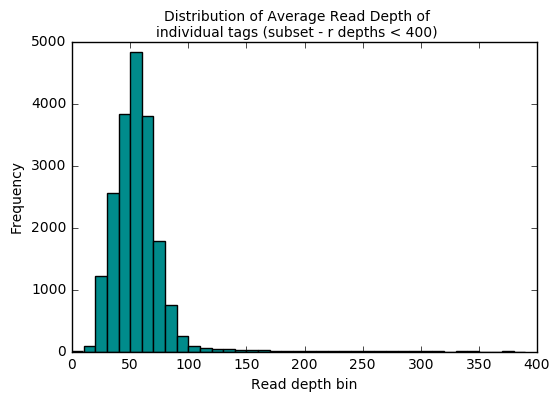

In [40]:
plt.hist(count_less_1000, bins = np.arange(0,400, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags (subset - r depths < 400)")
plt.show()

In [41]:
plt.close()


<br>
<br>
<br>
<br>
### Distribution of SNP Positions along Read Length


**I plotted all of the SNP positions across the 92 bp read**

**SNP position was found using the catalog of biallelic, polymorphic loci produced by Marine's filtering script.**


In [42]:
cd ../analyses/stacks_pipeline_visuals/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/stacks_pipeline_visuals


In [43]:
# create a list of snp position using marine's catalog file
infile = open("../../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

snp_positions = []

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        snp_positions.append(snp_pos)
    elif len(linelist) == 5:
        snp_pos = int(linelist[3])
        snp_positions.append(snp_pos)
        snp_pos = int(linelist[4])
        snp_positions.append(snp_pos)
        
infile.close()



In [44]:
len(snp_positions)

6542

In [45]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

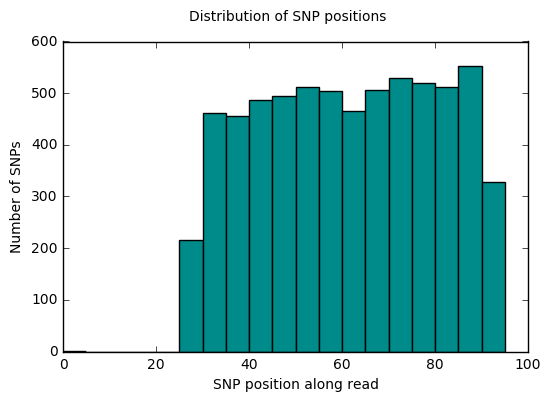

In [46]:
# plot histogram
plt.hist(snp_positions, bins = np.arange(0,100, 5), color = "darkcyan")
plt.xlabel("SNP position along read")
plt.ylabel("Number of SNPs")
plt.suptitle("Distribution of SNP positions")
plt.show()

In [47]:
plt.close()

<br>

<br>
<br>

### Fst v. SNP position

** I plotted the Fst of each locus against the position of the SNP along the 92 bp read**

** Fst of each locus was found by running `genepop` and then using Dan Drinan's parsing script.**


<br>

In [90]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

I first have to parse genepop output with Dan's script. 

**(1)** Ran genepop option **6** >> **1**

**(2)** Used Dan's python script to parse genepop output

In [91]:
cd genepop

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop


In [92]:
!head parseGenepopINFandFST.py

################################################################################
#
# parseGenepopINF.py - this is a script used to parse output files created
# by genepop
#
# 2017-March-21
# Daniel Drinan (ddrinan@uw.edu)
#
# population - HWE, He (INF), Ho (INF), Fis_wc (INF), Fis_RH (INF)
################################################################################


In [53]:
!mv ../../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.FST batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.FST

In [93]:
!python parseGenepopINFandFST.py \
-f batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.FST \
-o batch_2_FSTgenepop_parsed_output.txt

In [55]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop'

In [56]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()


infile2 = open("batch_2_FSTgenepop_parsed_output.txt", "r")

# create dictionary of fst values by locus
fst_dict = {}

for line in infile2:
    if "locus" not in line:
        locus = line.strip().split()[0]
        fst = float(line.strip().split()[2])
        fst_dict[locus] = fst

infile2.close()


In [57]:
# check to make sure that all SNPs from the FST genepop file are in the 
#SNP list from the biallelic catalog.

loci_2snps = []
fst_loci_list = fst_dict.keys()
snp_loci_list = snp_pos_dict.keys()
for locus in fst_loci_list:
    if locus not in snp_loci_list:
        loci_2snps.append(locus)
print "These are the loci that have two SNPs, and so were taken out of this analysis:"
print loci_2snps
        

These are the loci that have two SNPs, and so were taken out of this analysis:
['2260', '1225', '4724', '1143', '7686', '3829', '12033', '17296', '16838', '4838', '14861', '6513', '2509', '3026', '5079', '11124', '7148', '9008', '8496', '7484', '1455', '8400', '8338', '16416', '10784', '17424', '11300', '18309', '4237', '11514', '10919', '13358', '5114', '11998', '13177', '17320', '12161', '11220', '9065', '8978', '2908', '7137', '6588', '18061', '11154', '4667', '10940', '6008', '6312', '17495', '2933', '17649', '14382', '1788']


In [58]:

# create list of loci
# from the Fis file b/c of extra filtering done AFTER marine's file generated.

loci_list = fst_dict.keys()
snp_loci_list = snp_pos_dict.keys()
snp_pos_list = []
fst_list = []

for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        fst = float(fst_dict[locus])
        fst_list.append(fst)


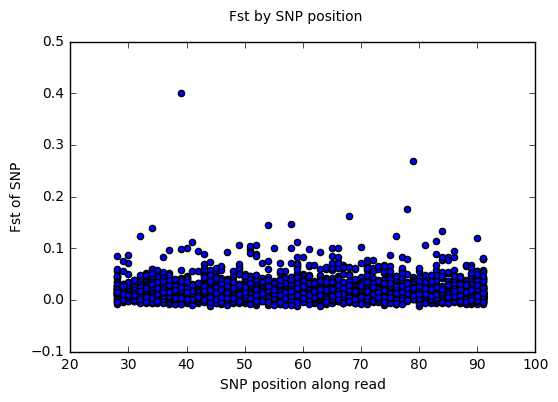

In [59]:
#create scatterplot
plt.scatter(snp_pos_list, fst_list)
plt.suptitle("Fst by SNP position")
plt.xlabel("SNP position along read")
plt.ylabel("Fst of SNP")
plt.show()

In [60]:
plt.close()


<br>


<br>
### Heterozygosity v. SNP position

** This plots the observed heterozygosity of the haplotype against the SNP position in the 92 bp read**

**SNP position was found using Marine's filtering script output for biallelic, polymorphic SNPs**

**Heterozygosity was found using `genepop` and then parsing the output with Dan Drinan's script.**

<br>

<br>

<br>
I first need a parsed .INF genepop file...

**(1)** Genepop option **5** >> **1**

**(2)** Use Dan's script to parse out the .INF output file.

In [61]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop'

In [62]:
!mv ../../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.INF batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.INF 

In [64]:
!python parseGenepopINFandFST.py \
-i batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt.INF \
-o batch_2_INFgenepop_parsed_output.txt

^CTraceback (most recent call last):
  File "parseGenepopINFandFST.py", line 51, in <module>
    line = input_file.readline()
KeyboardInterrupt



In [67]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo


In [72]:
cd analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [73]:
infile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

# create a list of populations and a dictionary 
# dictionary keys are loci, values are list of He by population

h_dict = {}
pop_list = []

for line in infile: 
    if "pop" not in line:
        #create population list
        linelist = line.strip().split()
        population = linelist[0]
        if population not in pop_list:
            pop_list.append(population)
        # create new dictionary entry to append to existing entry
        locus = linelist[1]
        if locus not in h_dict.keys():
            Ho = float(linelist[3])
            h_dict[locus] = [Ho]
        elif locus in h_dict.keys():
            het_list = h_dict[locus]
            Ho = float(linelist[3])
            het_list.append(Ho)
            h_dict[locus] = het_list

infile.close()

In [74]:
loci_list = h_dict.keys()
loci_list[0:5]

['16073', '16075', '13732', '11545', '11549']

Some of the loci don't have the heterozygosity measurements for all of the populations, while others do:

In [76]:
h_dict['16075']

[0.0952380952381,
 0.117647058824,
 0.027027027027,
 0.0714285714286,
 0.386363636364,
 0.0714285714286,
 0.0416666666667,
 0.136363636364]

*this locus has calculated heterozygosities for all populations*

In [77]:
h_dict['13732']

[0.105263157895,
 0.212121212121,
 0.0526315789474,
 0.0526315789474,
 0.0416666666667,
 0.232558139535]

*this locus has calculated heterozygosities for only 7 / 8 populations*

This was an error while parsing the genepop output because of the stupid way that genepop formats its output files. It's not expected to greatly impact the graphs that I made, so I won't worry about this too much, but will just have to keep it in mind going forward. 

In [79]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()

snp_loci_list = snp_pos_dict.keys()

In [80]:
# get list of loci
loci_list = h_dict.keys()
avg_he_list = []
snp_pos_list = []

#find average he at each locus
for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        he_list = h_dict[locus]
        sum = 0
        for he in he_list:
            sum += float(he)
        average = float(sum)/float(len(he_list))
        avg_he_list.append(average)

In [81]:
len(avg_he_list)

2356

In [82]:
len(snp_pos_list)

2356

In [83]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

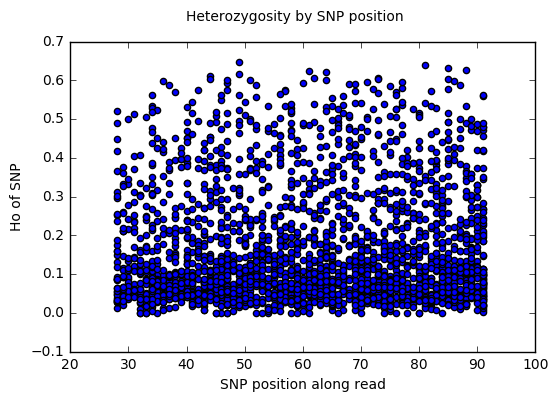

In [84]:
#create scatterplot
plt.scatter(snp_pos_list, avg_he_list)
plt.suptitle("Heterozygosity by SNP position")
plt.xlabel("SNP position along read")
plt.ylabel("Ho of SNP")
plt.show()

In [29]:
plt.close()




<br>
<br>
<br>

### Fis v. Heterozygosity

** This plots locus-specific Fis values against observed heterozygosity**


**Both Fis and Ho were calculated using `genepop`**



<br>

<br>
From the last two visualizations, I already have He and Fis lists. The indices should be the same since they are both listed in order of SNP position. 

In [85]:
len(avg_he_list)

2356

In [94]:
# create a dictionary with snp positions at each locus
# uses marine's catalog file, only for haplotypes with a single snp

infile = open("../../stacks_b2_wgenome/batch_2.biallelic_catalog.tsv", "r")

#create dictionary of snp positions by locus
snp_pos_dict = {}

for line in infile:
    linelist = line.strip().split("\t")
    if len(linelist) == 4:
        snp_pos = int(linelist[3])
        locus = linelist[0]
        snp_pos_dict[locus] = snp_pos
    
        
infile.close()


infile2 = open("batch_2_FSTgenepop_parsed_output.txt", "r")

# create dictionary of fis values by locus
fis_dict = {}

for line in infile2:
    if "locus" not in line:
        locus = line.strip().split()[0]
        fis = float(line.strip().split()[1])
        fis_dict[locus] = fis

infile2.close()

In [98]:
# check to make sure that all SNPs from the FST genepop file are in the 
#SNP list from the biallelic catalog.

loci_2snps = []
fis_loci_list = fis_dict.keys()
snp_loci_list = snp_pos_dict.keys()
for locus in fis_loci_list:
    if locus not in snp_loci_list:
        loci_2snps.append(locus)
print "These are the loci that have two SNPs, and so were taken out of this analysis:"
print loci_2snps
        

These are the loci that have two SNPs, and so were taken out of this analysis:
['2260', '1225', '4724', '1143', '7686', '3829', '12033', '17296', '16838', '4838', '14861', '6513', '2509', '3026', '5079', '11124', '7148', '9008', '8496', '7484', '1455', '8400', '8338', '16416', '10784', '17424', '11300', '18309', '4237', '11514', '10919', '13358', '5114', '11998', '13177', '17320', '12161', '11220', '9065', '8978', '2908', '7137', '6588', '18061', '11154', '4667', '10940', '6008', '6312', '17495', '2933', '17649', '14382', '1788']


In [99]:

# create list of loci
# from the Fis file b/c of extra filtering done AFTER marine's file generated.

loci_list = fis_dict.keys()
snp_loci_list = snp_pos_dict.keys()
snp_pos_list = []
fis_list = []

for locus in loci_list:
    if locus in snp_loci_list:
        snp_pos = int(snp_pos_dict[locus])
        snp_pos_list.append(snp_pos)
        fis = float(fis_dict[locus])
        fis_list.append(fis)


In [100]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

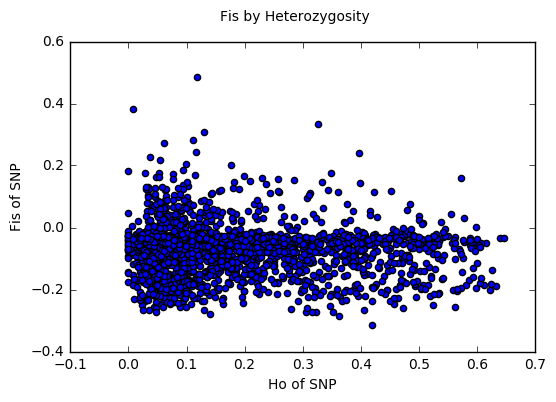

In [101]:
#create scatterplot
plt.scatter(avg_he_list, fis_list)
plt.suptitle("Fis by Heterozygosity")
plt.xlabel("Ho of SNP")
plt.ylabel("Fis of SNP")
plt.show()

In [102]:
plt.close()



<br>
<br>

### Number of loci genotyped v. Heterozygosity per individual

**This looks at the number of loci actually genotyped in each individual v. their heterozygosity**




In [12]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [57]:
### Find the percent missing data per individual and the % of heterozygotes per individual from a genepop file ###
infile = open("../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt", "r")

for line in infile:
    if line.startswith("Pop"):
        break

import collections 
sample_count = 0
pop_count = 1

missing_data = collections.OrderedDict()
obs_het = collections.OrderedDict()

for line in infile:
    if line.startswith("Pop"):
        pop_count += 1
    else:
        sampID = line.strip().split()[0]
        missing = line.count("0000")
        hets = line.count("0102")
        genotyped = float(2959)-float(missing)
        missing_data[sampID] = genotyped
        p_het = float(hets)/float(genotyped)
        obs_het[sampID] = p_het
        sample_count += 1
infile.close()

In [58]:
#check that it read all pops
print pop_count

8


In [59]:
#check that it read all samples
print len(missing_data.keys())

286


In [60]:
#make sure that the ordered dictionary is working
test_fromdict = missing_data.values()
print test_fromdict[0]
print missing_data["KOD03_035,"]

2944.0
2944.0


In [61]:
#make sure that the ordered dictionary is working
test_fromdict = obs_het.values()
print test_fromdict[0]
print obs_het["KOD03_035,"]

0.159307065217
0.159307065217


In [65]:
#make corresponding list of observed heterozygosities and missing data
ho_list = obs_het.values()
missing_list = missing_data.values()

In [66]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

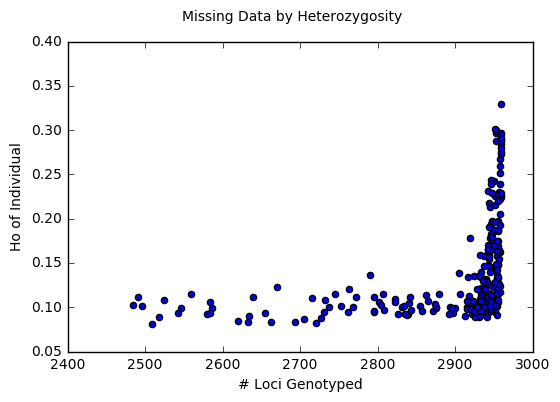

In [67]:
#create scatterplot
plt.scatter(missing_list, ho_list)
plt.suptitle("Missing Data by Heterozygosity")
plt.ylabel("Ho of Individual")
plt.xlabel("# Loci Genotyped")
plt.show()

In [96]:
plt.close()

### The calculated heterozygosities here should match the first graph of heterozygosity v. read depth - why doesn't it??? -- below, I used the heterozygosities found with Dan's script for the first graph. 

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [2]:
cd analyses

[Errno 2] No such file or directory: 'analyses'
/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks


In [51]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [52]:
### Find the percent missing data per individual from a genepop file ###
infile = open("../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt", "r")

for line in infile:
    if line.startswith("Pop"):
        break

import collections 
sample_count = 0
pop_count = 1

missing_data = collections.OrderedDict()

for line in infile:
    if line.startswith("Pop"):
        pop_count += 1
    else:
        sampID = line.strip().split()[0]
        missing = line.count("0000")
        genotyped = float(2959)-float(missing)
        missing_data[sampID] = genotyped
        sample_count += 1
infile.close()

In [53]:
print missing_data.keys()

['KOD03_035,', 'KOD03_051,', 'KOD03_052,', 'KOD03_053,', 'KOD03_054,', 'KOD03_055,', 'KOD03_056,', 'KOD03_057,', 'KOD03_058,', 'KOD03_059,', 'KOD03_060,', 'KOD03_061,', 'KOD03_063,', 'KOD03_064,', 'KOD03_065,', 'KOD03_066,', 'KOD03_067,', 'KOD03_068,', 'KOD03_069,', 'KOD03_070,', 'KOD03_071,', 'KOD03_072,', 'KOD03_073,', 'KOD03_074,', 'KOD03_075,', 'KOD03_076,', 'KOD03_077,', 'KOD03_078,', 'KOD03_079,', 'KOD03_080,', 'KOD03_081,', 'KOD03_082,', 'KOD03_083,', 'KOD03_084,', 'KOD03_085,', 'KOD03_086,', 'KOD03_089,', 'KOD03_090,', 'KOD03_093,', 'KOD03_094,', 'KOD03_095,', 'KOD03_096,', 'KOD03_097,', 'AD06_001,', 'AD06_003,', 'AD06_004,', 'AD06_006,', 'AD06_007,', 'AD06_008,', 'AD06_009,', 'AD06_010,', 'AD06_011,', 'AD06_012,', 'AD06_013,', 'AD06_017,', 'AD06_018,', 'AD06_019,', 'AD06_020,', 'AD06_021,', 'AD06_023,', 'AD06_025,', 'AD06_029,', 'AD06_030,', 'AD06_032,', 'AD06_033,', 'AD06_035,', 'AD06_036,', 'AD06_037,', 'AD06_038,', 'AD06_039,', 'AD06_040,', 'AD06_041,', 'AD06_042,', 'AD06_0

In [54]:
## Find the heterozygosity per individual using output from Dan's HetVreaddepth script

infile = open("batch2_HetvReadDepth_filtered")

het_dict = {}
infile.readline()
for line in infile:
    sample = line.strip().split()[0]+','
    prop_het = line.strip().split()[2]
    het_dict[sample] = prop_het
infile.close

samples = het_dict.keys()
genotyped_list = []
het_list = []

for i in samples:
    genotyped_list.append(missing_data[i])
    het_list.append(het_dict[i])

    

In [55]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

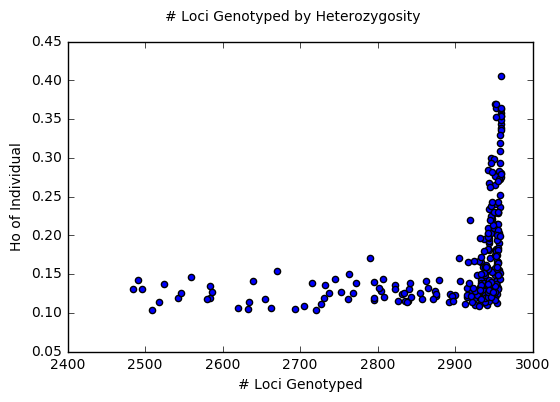

In [56]:
#create scatterplot
plt.scatter(genotyped_list, het_list)
plt.suptitle("# Loci Genotyped by Heterozygosity")
plt.ylabel("Ho of Individual")
plt.xlabel("# Loci Genotyped")
plt.show()




<br>
<br>
### Population expected Heterozygosity v. Population average read depth

In [41]:
### find pop He by averaging He in .INF parsed file across loci


infile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

kod = []
ad = []
wc = []
hs = []
ps = []
gs = []
pws = []
up = []


for line in infile:
    if line.startswith("KOD"):
        kod.append(float(line.strip().split()[2]))
    elif line.startswith("AD"):
        ad.append(float(line.strip().split()[2]))
    elif line.startswith("WC"):
        wc.append(float(line.strip().split()[2]))
    elif line.startswith("HS"):
        hs.append(float(line.strip().split()[2]))
    elif line.startswith("PS"):
        ps.append(float(line.strip().split()[2]))
    elif line.startswith("GS"):
        gs.append(float(line.strip().split()[2]))
    elif line.startswith("PWS"):
        pws.append(float(line.strip().split()[2]))
    elif line.startswith("UP"):
        up.append(float(line.strip().split()[2]))
infile.close()

exp_het = [float(sum(kod))/float(len(kod)), float(sum(ad))/float(len(ad)), float(sum(wc))/float(len(wc)), float(sum(hs))/float(len(hs)), float(sum(ps))/float(len(ps)), float(sum(gs))/float(len(gs)), float(sum(pws))/float(len(pws)), float(sum(up))/float(len(up))]

In [42]:
#find population average read depth 


infile = open("batch2_HetvReadDepth_filtered", "r")

kod = []
ad = []
wc = []
hs = []
ps = []
gs = []
pws = []
up = []


for line in infile:
    if line.startswith("KOD"):
        kod.append(float(line.strip().split()[1]))
    elif line.startswith("AD"):
        ad.append(float(line.strip().split()[1]))
    elif line.startswith("WC"):
        wc.append(float(line.strip().split()[1]))
    elif line.startswith("HS"):
        hs.append(float(line.strip().split()[1]))
    elif line.startswith("PS"):
        ps.append(float(line.strip().split()[1]))
    elif line.startswith("GS"):
        gs.append(float(line.strip().split()[1]))
    elif line.startswith("PWS"):
        pws.append(float(line.strip().split()[1]))
    elif line.startswith("UP"):
        up.append(float(line.strip().split()[1]))
infile.close()


read_depths = [float(sum(kod))/float(len(kod)), float(sum(ad))/float(len(ad)), float(sum(wc))/float(len(wc)), float(sum(hs))/float(len(hs)), float(sum(ps))/float(len(ps)), float(sum(gs))/float(len(gs)), float(sum(pws))/float(len(pws)), float(sum(up))/float(len(up))]

In [43]:
print exp_het
print read_depths

[0.16324334779825098, 0.15860103920472, 0.14276256450770328, 0.15089472215707597, 0.1473468417656152, 0.13795096526417816, 0.16696520534595063, 0.147071367684073]
[2692075.8372093025, 2062103.2571428572, 2434519.3333333335, 2651982.9523809524, 2637274.1333333333, 2062387.857142857, 3766851.1666666665, 2435556.4318181816]


In [24]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

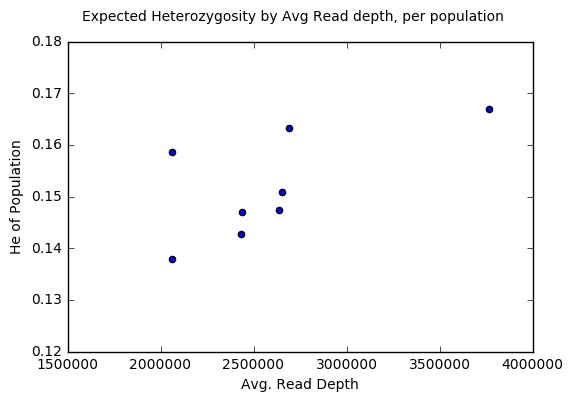

In [29]:
#create scatterplot
plt.scatter(read_depths, exp_het)
plt.suptitle("Expected Heterozygosity by Avg Read depth, per population")
plt.ylabel("He of Population")
plt.xlabel("Avg. Read Depth")
plt.show()

In [30]:
plt.close()

In [44]:
np.corrcoef(read_depths, exp_het)

array([[ 1.       ,  0.6455738],
       [ 0.6455738,  1.       ]])



<br>
<br>
### Fis v. read depth, by population



In [34]:
### find pop Fis by averaging Fis in .INF parsed file across loci


infile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

kod = []
ad = []
wc = []
hs = []
ps = []
gs = []
pws = []
up = []


for line in infile:
    if line.startswith("KOD"):
        kod.append(float(line.strip().split()[4]))
    elif line.startswith("AD"):
        ad.append(float(line.strip().split()[4]))
    elif line.startswith("WC"):
        wc.append(float(line.strip().split()[4]))
    elif line.startswith("HS"):
        hs.append(float(line.strip().split()[4]))
    elif line.startswith("PS"):
        ps.append(float(line.strip().split()[4]))
    elif line.startswith("GS"):
        gs.append(float(line.strip().split()[4]))
    elif line.startswith("PWS"):
        pws.append(float(line.strip().split()[4]))
    elif line.startswith("UP"):
        up.append(float(line.strip().split()[4]))
infile.close()

fis = [float(sum(kod))/float(len(kod)), float(sum(ad))/float(len(ad)), float(sum(wc))/float(len(wc)), float(sum(hs))/float(len(hs)), float(sum(ps))/float(len(ps)), float(sum(gs))/float(len(gs)), float(sum(pws))/float(len(pws)), float(sum(up))/float(len(up))]

In [35]:
#find population average read depth 


infile = open("batch2_HetvReadDepth_filtered", "r")

kod = []
ad = []
wc = []
hs = []
ps = []
gs = []
pws = []
up = []


for line in infile:
    if line.startswith("KOD"):
        kod.append(float(line.strip().split()[1]))
    elif line.startswith("AD"):
        ad.append(float(line.strip().split()[1]))
    elif line.startswith("WC"):
        wc.append(float(line.strip().split()[1]))
    elif line.startswith("HS"):
        hs.append(float(line.strip().split()[1]))
    elif line.startswith("PS"):
        ps.append(float(line.strip().split()[1]))
    elif line.startswith("GS"):
        gs.append(float(line.strip().split()[1]))
    elif line.startswith("PWS"):
        pws.append(float(line.strip().split()[1]))
    elif line.startswith("UP"):
        up.append(float(line.strip().split()[1]))
infile.close()


read_depths = [float(sum(kod))/float(len(kod)), float(sum(ad))/float(len(ad)), float(sum(wc))/float(len(wc)), float(sum(hs))/float(len(hs)), float(sum(ps))/float(len(ps)), float(sum(gs))/float(len(gs)), float(sum(pws))/float(len(pws)), float(sum(up))/float(len(up))]

In [36]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

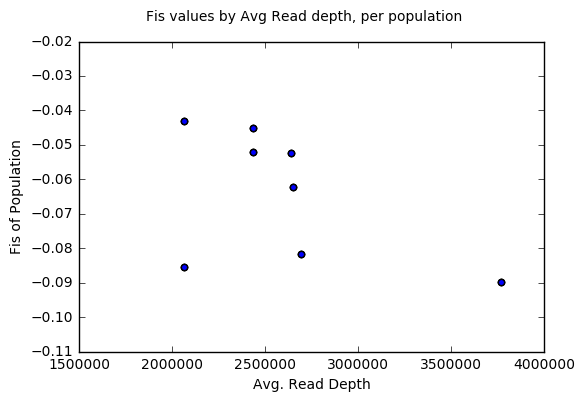

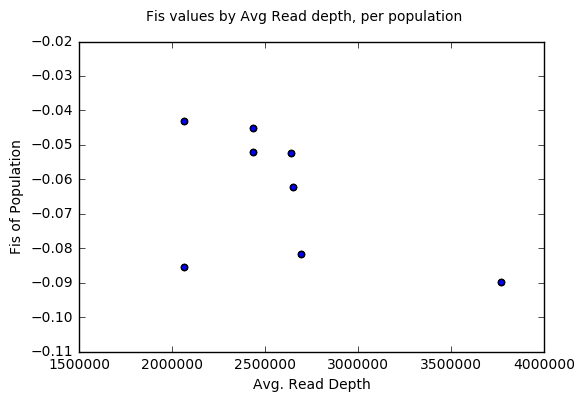

In [49]:
#create scatterplot

plt.scatter(read_depths, fis)

plt.suptitle("Fis values by Avg Read depth, per population")
plt.ylabel("Fis of Population")
plt.xlabel("Avg. Read Depth")

plt.show()

In [50]:
plt.close()

In [40]:
np.corrcoef(read_depths, fis)

array([[ 1.       , -0.5080224],
       [-0.5080224,  1.       ]])



<br>
<br>

### Fis per locus v. average read depth per locus

use .INF file for Fis per locus per population

In [35]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [36]:
!head -n 20 readDepthVsFis.py


# script for Mary that will estimate average read depth per population per locus
# and compare it to Fis values (from a file Mary already has).
#
#
# population names in '-s' file and '-f' files must match
#

import argparse, sys

parser = argparse.ArgumentParser()
parser.add_argument("-s", "--samples", help="file containing samples to parse. each line contains 'sample pop'.")
parser.add_argument("-d", "--directory", help="directory containing 'matches' files.")
parser.add_argument("-o", "--output", help="output file.")
parser.add_argument("-f", "--fis_file", help="file containing Fis information.")

args = parser.parse_args()

sample_list_file = open(args.samples, 'r') # some file that has a list of the 'sample population'
matches_path = args.directory # directory of matches files


In [ ]:
!python readDepthVsFis

In [38]:
!python readDepthVsFis.py \
-s genepop/batch_2_FinalFiltered_Ind-GenepopPops.txt \
-d ../stacks_b2_wgenome \
-o batch_2_depthVfis.txt \
-f genepop/batch_2_INFgenepop_parsed_output.txt \

Parsing sample: UP03_048Traceback (most recent call last):
  File "readDepthVsFis.py", line 95, in <module>
    tmp_fis = fis_values[pop][locus]
KeyError: '13357'


In [41]:
!python readDepthVsFis_revised.py \
-s genepop/batch_2_FinalFiltered_Ind-GenepopPops.txt \
-d ../stacks_b2_wgenome \
-o batch_2_depthVfis.txt \
-f genepop/batch_2_INFgenepop_parsed_output.txt \

Parsing sample: UP03_048



In [2]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [3]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses



<br>
Now I need to plot the average read depth per locus for each population. I can do this by creating two dictionaries for each locus: one for average population read depth, and one for fis value. I'll also create a dictionary of color values, one for each population, in the order that the depth / fis values for each population will be added to the dictionary value lists -- I can't create just a list because there may be populations that do not have a locus present. 

In [32]:
infile = open("batch_2_depthVfis.txt", "r")

## create dictionaries of avg depth and fis per locus per population. ##
## Key = locus. Value = list of population values ##

colors_dict = {}
depth_dict = {}
fis_dict= {}

infile.readline()

for line in infile:
    linelist = line.strip().split()
    locus = linelist[1]
    pop = linelist[0]
    avg_depth = linelist[4]
    fis = linelist[5]
    loci_list = depth_dict.keys()
    if locus not in loci_list:
        depth_dict[locus] = [avg_depth]
        fis_dict[locus] = [fis]
        if "AD" in pop:
            colors_dict[locus] = ["Navy"]
        elif "WC" in pop:
            colors_dict[locus] = ["MediumAquamarine"]
        elif "HS" in pop:
            colors_dict[locus] = ["Chartreuse"]
        elif "UP" in pop:
            colors_dict[locus] = ["Gold"]
        elif "GS" in pop:
            colors_dict[locus] = ["DarkSalmon"]
        elif "PS" in pop:
            colors_dict[locus] = ["OrangeRed"]
        elif "PWS" in pop:
            colors_dict[locus] = ["MediumVioletRed"]
        elif "KOD" in pop:
            colors_dict[locus] = ["MediumPurple"]
    elif locus in loci_list:
        depth_dict[locus] += [avg_depth]
        fis_dict[locus] += [fis]
        if "AD" in pop:
            colors_dict[locus] += ["Navy"]
        elif "WC" in pop:
            colors_dict[locus] += ["MediumAquamarine"]
        elif "HS" in pop:
            colors_dict[locus] += ["Chartreuse"]
        elif "UP" in pop:
            colors_dict[locus] += ["Gold"]
        elif "GS" in pop:
            colors_dict[locus] += ["DarkSalmon"]
        elif "PS" in pop:
            colors_dict[locus] += ["OrangeRed"]
        elif "PWS" in pop:
            colors_dict[locus] += ["MediumVioletRed"]
        elif "KOD" in pop:
            colors_dict[locus] += ["MediumPurple"]

infile.close()

In [33]:
print len(depth_dict.keys())

2410


In [34]:
print len(fis_dict.keys())

2410


In [35]:
print len(colors_dict.keys())

2410


In [36]:
fis_list = []
depth_list = []
colors_list = []

for locus in fis_dict.keys():
    for i in fis_dict[locus]:
        fis_list.append(float(i))
    for j in depth_dict[locus]:
        depth_list.append(float(j))
    for k in colors_dict[locus]:
        colors_list.append(k)

In [37]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

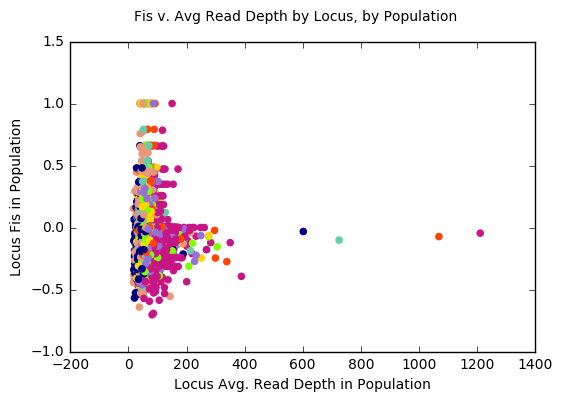

In [40]:
#create scatterplot

plt.scatter(depth_list, fis_list, color = colors_list)

plt.suptitle("Fis v. Avg Read Depth by Locus, by Population")
plt.ylabel("Locus Fis in Population")
plt.xlabel("Locus Avg. Read Depth in Population")

plt.show()

In [41]:
plt.close()



#### Looking at only those loci with avg. read depths below 600 

The locus with the highest four avg read depths was #6331, and those four populations were the only pops that it was found in. 

In [42]:
infile = open("batch_2_depthVfis_depthLT600.txt", "r")

## create dictionaries of avg depth and fis per locus per population. ##
## Key = locus. Value = list of population values ##

colors_dict = {}
depth_dict = {}
fis_dict= {}

infile.readline()

for line in infile:
    linelist = line.strip().split()
    locus = linelist[1]
    pop = linelist[0]
    avg_depth = linelist[4]
    fis = linelist[5]
    loci_list = depth_dict.keys()
    if locus not in loci_list:
        depth_dict[locus] = [avg_depth]
        fis_dict[locus] = [fis]
        if "AD" in pop:
            colors_dict[locus] = ["Navy"]
        elif "WC" in pop:
            colors_dict[locus] = ["MediumAquamarine"]
        elif "HS" in pop:
            colors_dict[locus] = ["Chartreuse"]
        elif "UP" in pop:
            colors_dict[locus] = ["Gold"]
        elif "GS" in pop:
            colors_dict[locus] = ["DarkSalmon"]
        elif "PS" in pop:
            colors_dict[locus] = ["OrangeRed"]
        elif "PWS" in pop:
            colors_dict[locus] = ["MediumVioletRed"]
        elif "KOD" in pop:
            colors_dict[locus] = ["MediumPurple"]
    elif locus in loci_list:
        depth_dict[locus] += [avg_depth]
        fis_dict[locus] += [fis]
        if "AD" in pop:
            colors_dict[locus] += ["Navy"]
        elif "WC" in pop:
            colors_dict[locus] += ["MediumAquamarine"]
        elif "HS" in pop:
            colors_dict[locus] += ["Chartreuse"]
        elif "UP" in pop:
            colors_dict[locus] += ["Gold"]
        elif "GS" in pop:
            colors_dict[locus] += ["DarkSalmon"]
        elif "PS" in pop:
            colors_dict[locus] += ["OrangeRed"]
        elif "PWS" in pop:
            colors_dict[locus] += ["MediumVioletRed"]
        elif "KOD" in pop:
            colors_dict[locus] += ["MediumPurple"]

infile.close()

In [43]:
fis_list = []
depth_list = []
colors_list = []

for locus in fis_dict.keys():
    for i in fis_dict[locus]:
        fis_list.append(float(i))
    for j in depth_dict[locus]:
        depth_list.append(float(j))
    for k in colors_dict[locus]:
        colors_list.append(k)

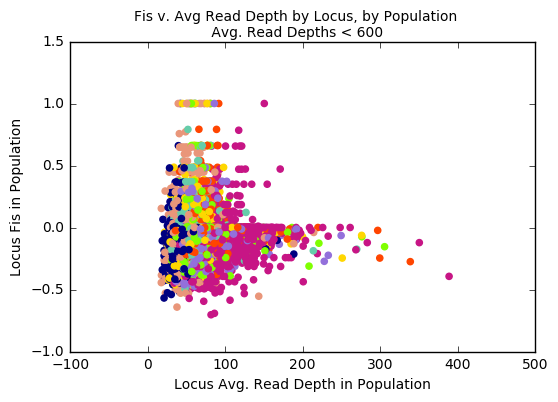

In [44]:
#create scatterplot

plt.scatter(depth_list, fis_list, color = colors_list)

plt.suptitle("Fis v. Avg Read Depth by Locus, by Population\n Avg. Read Depths < 600")
plt.ylabel("Locus Fis in Population")
plt.xlabel("Locus Avg. Read Depth in Population")

plt.show()

In [45]:
plt.close()




<br>
<br>
### Matching Fis at loci across two populations

In [79]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [80]:
infile = open("genepop/batch_2_INFgenepop_parsed_output.txt", "r")

kod_dict = {}

up_dict = {}

for line in infile:
    if "locus" not in line:
        if line.startswith("KOD"):
            linelist = line.strip().split()
            kod_dict[linelist[1]] = linelist[4]
        elif line.startswith("UP"):
            linelist = line.strip().split()
            up_dict[linelist[1]] = linelist[4]
infile.close()


loci_listk = kod_dict.keys()
loci_listu = up_dict.keys()

fis_kod = []
fis_up = []

for locus in loci_listk:
    if locus in loci_listu:
        fis_kod.append(kod_dict[locus])
        fis_up.append(up_dict[locus])
print len(fis_kod)
print len(fis_up)

1914
1914


In [81]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

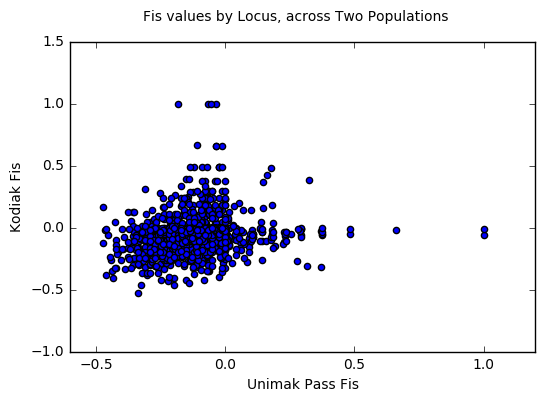

In [82]:
#create scatterplot

plt.scatter(fis_kod, fis_up)

plt.suptitle("Fis values by Locus, across Two Populations")
plt.ylabel("Kodiak Fis")
plt.xlabel("Unimak Pass Fis")

plt.show()

In [86]:
print [i for i in fis_kod if float(i) > 0.98]

['1.0000', '1.0000']





<br>
<br>

### Read depth per allele within a single individual. 

I need to go into the final genepop file and get the list of loci, then for each locus look up the stack depths of each allele. 

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [2]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [3]:
genepop = open("../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt", "r")

loci_list = []
for line in genepop:
    if not line.startswith("Pop"):
        if "Korea" not in line:
            loci_list.append(line.strip())

genepop.close()

matches = open("../stacks_b2_wgenome/UP03_048.matches.tsv", "r")

matched_loci = []
a1_depth = {}
a2_depth = {}
for line in matches:
    if "sstacks" not in line:
        linelist = line.strip().split()
        locus = linelist[2]
        if locus in loci_list:
            if locus not in matched_loci:
                matched_loci.append(locus)
                a1_depth[locus] = linelist[6]
            elif locus in matched_loci:
                a2_depth[locus] = linelist[6]
matches.close()

In [4]:
len(a1_depth.keys())

2384

In [5]:
len(a2_depth.keys())

263

In [6]:
print a2_depth.keys()

['2965', '4302', '769', '9730', '11198', '2651', '13929', '16179', '8150', '12830', '130', '13657', '12390', '12977', '1546', '16847', '18198', '5989', '6648', '10180', '6574', '5273', '6640', '7611', '11117', '16067', '18299', '1378', '7751', '13487', '9934', '10524', '9274', '4339', '1154', '15938', '3839', '15430', '1490', '5752', '1492', '6445', '16262', '1495', '13414', '10119', '2554', '8338', '12790', '12536', '10966', '4730', '3566', '15059', '10961', '11141', '13310', '1823', '9468', '8703', '14747', '12268', '5857', '5919', '3846', '2257', '18928', '16178', '7895', '17242', '1382', '13732', '12508', '10042', '12901', '1921', '391', '16250', '10237', '12981', '17144', '11208', '4200', '14616', '9494', '8131', '13140', '1712', '6783', '15114', '15641', '6513', '13498', '5096', '2381', '12140', '1018', '17319', '11283', '8966', '3812', '1832', '2769', '9084', '3661', '10131', '6828', '2937', '13865', '7899', '8072', '14049', '9081', '3261', '7909', '9005', '13679', '3249', '5489

In [7]:
print a2_depth['2965']

28


In [8]:
print a2_depth['4302']

22


In [9]:
polymorphic_loci = a2_depth.keys()

a1_depthL = []
a2_depthL = []

for locus in polymorphic_loci:
    a1_depthL.append(a1_depth[locus])
    a2_depthL.append(a2_depth[locus])

In [10]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

In [11]:
total_depth = {}
for locus in matched_loci:
    if locus in polymorphic_loci:
        new_depth = float(a1_depth[locus]) + float(a2_depth[locus])
        total_depth[locus] = new_depth

In [14]:
new_depth = float(a1_depth['130']) + float(a2_depth['130'])

In [15]:
print new_depth

60.0


In [16]:
print a1_depth['130']

26


In [17]:
print a2_depth['130']

34


In [18]:
a1_prop = []
a2_prop = []
for locus in matched_loci:
    if locus in polymorphic_loci:
        a2_prop.append(float(a2_depth[locus])/float(total_depth[locus]))
        a1_prop.append(float(a1_depth[locus])/float(total_depth[locus]))

In [19]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

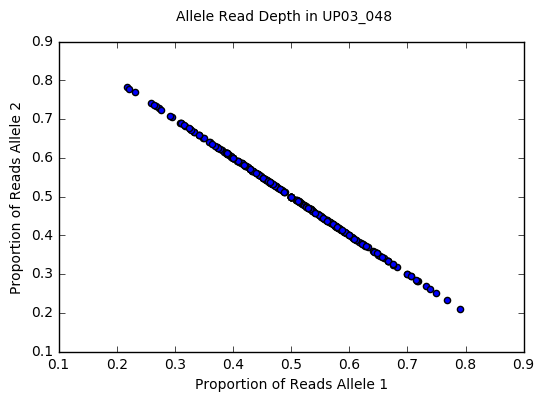

In [23]:
#create scatterplot
plt.scatter(a1_prop, a2_prop)


plt.suptitle("Allele Read Depth in UP03_048")
plt.ylabel("Proportion of Reads Allele 2")
plt.xlabel("Proportion of Reads Allele 1")

plt.show()

In [24]:
plt.close()

In [26]:
genepop = open("../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids_filteredHWE.txt", "r")

loci_list = []
for line in genepop:
    if not line.startswith("Pop"):
        if "Korea" not in line:
            loci_list.append(line.strip())

genepop.close()

matches = open("../stacks_b2_wgenome/AD06_025.matches.tsv", "r")

matched_loci = []
a1_depth = {}
a2_depth = {}
for line in matches:
    if "sstacks" not in line:
        linelist = line.strip().split()
        locus = linelist[2]
        if locus in loci_list:
            if locus not in matched_loci:
                matched_loci.append(locus)
                a1_depth[locus] = linelist[6]
            elif locus in matched_loci:
                a2_depth[locus] = linelist[6]
matches.close()

In [27]:
polymorphic_loci = a2_depth.keys()

a1_depthL = []
a2_depthL = []

for locus in polymorphic_loci:
    a1_depthL.append(a1_depth[locus])
    a2_depthL.append(a2_depth[locus])

In [28]:
total_depth = {}
for locus in matched_loci:
    if locus in polymorphic_loci:
        new_depth = float(a1_depth[locus]) + float(a2_depth[locus])
        total_depth[locus] = new_depth

In [29]:
a1_prop = []
a2_prop = []
for locus in matched_loci:
    if locus in polymorphic_loci:
        a2_prop.append(float(a2_depth[locus])/float(total_depth[locus]))
        a1_prop.append(float(a1_depth[locus])/float(total_depth[locus]))

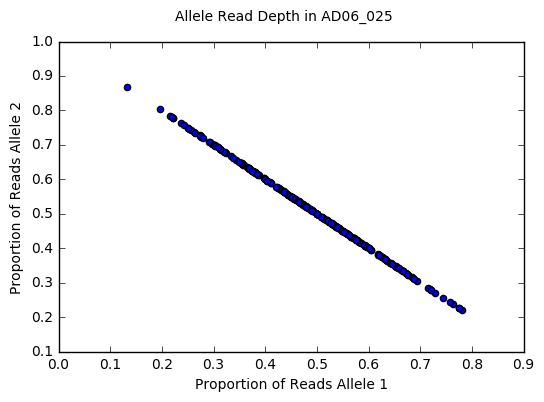

In [30]:
#create scatterplot
plt.scatter(a1_prop, a2_prop)


plt.suptitle("Allele Read Depth in AD06_025")
plt.ylabel("Proportion of Reads Allele 2")
plt.xlabel("Proportion of Reads Allele 1")

plt.show()

In [31]:
plt.close()

** with # of reads instead of proportion **

In [32]:
a1_num = []
a2_num = []
for locus in matched_loci:
    if locus in polymorphic_loci:
        a2_num.append(float(a2_depth[locus]))
        a1_num.append(float(a1_depth[locus]))

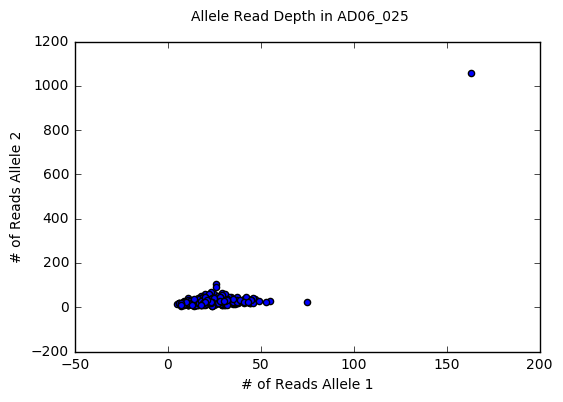

In [33]:
#create scatterplot
plt.scatter(a1_num, a2_num)


plt.suptitle("Allele Read Depth in AD06_025")
plt.ylabel("# of Reads Allele 2")
plt.xlabel("# of Reads Allele 1")

plt.show()

In [34]:
plt.close()